# **Libraries**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


# **Load and explore the dataset**

In [33]:
print("="*50)
print("STUDENT PERFORMANCE PREDICTION ANALYSIS")
print("="*50)

try:
    df = pd.read_csv("/content/StudentPerformanceFactors.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Please ensure the CSV file is in the correct path.")
    # Create sample data for demonstration
    np.random.seed(42)
    df = pd.DataFrame({
        'Hours_Studied': np.random.randint(1, 20, 1000),
        'Attendance': np.random.randint(60, 100, 1000),
        'Sleep_Hours': np.random.normal(7, 1.5, 1000),
        'Previous_Scores': np.random.randint(40, 95, 1000),
        'Tutoring_Sessions': np.random.randint(0, 8, 1000),
        'Physical_Activity': np.random.randint(0, 6, 1000),
        'Exam_Score': np.random.randint(50, 100, 1000)
    })
    print("Using sample data for demonstration.")

print(f"\nDataset Shape: {df.shape}")
print("\n" + "="*30)
print("DATASET OVERVIEW")
print("="*30)
print(df.head())


STUDENT PERFORMANCE PREDICTION ANALYSIS
Dataset loaded successfully!

Dataset Shape: (6607, 20)

DATASET OVERVIEW
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6           

In [34]:
print("\n" + "="*30)
print("DATASET INFO")
print("="*30)
print(df.info())


DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 n

In [35]:
print("\n" + "="*30)
print("STATISTICAL SUMMARY")
print("="*30)
print(df.describe())


STATISTICAL SUMMARY
       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000

# **DATA CLEANING**

In [36]:
print("\n" + "="*30)
print("DATA CLEANING")
print("="*30)
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

# 3. Handling Missing Values
# Example Strategies:
# - Fill numerical missing values with median
# - Fill categorical missing values with mode

# Fill missing in categorical columns
df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0], inplace=True)
df["Distance_from_Home"].fillna(df["Distance_from_Home"].mode()[0], inplace=True)
df["Parental_Education_Level"].fillna(df["Parental_Education_Level"].mode()[0], inplace=True)


# 4. Verify missing values handled
print("\nMissing values after cleaning:\n", df.isnull().sum())


DATA CLEANING
Missing values per column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Missing values after cleaning:
 Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level            

# **Check for duplicates**

In [37]:

duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Rows after removing duplicates: {len(df)}")

Duplicate rows: 0


# **EXPLORATORY DATA ANALYSIS**


EXPLORATORY DATA ANALYSIS


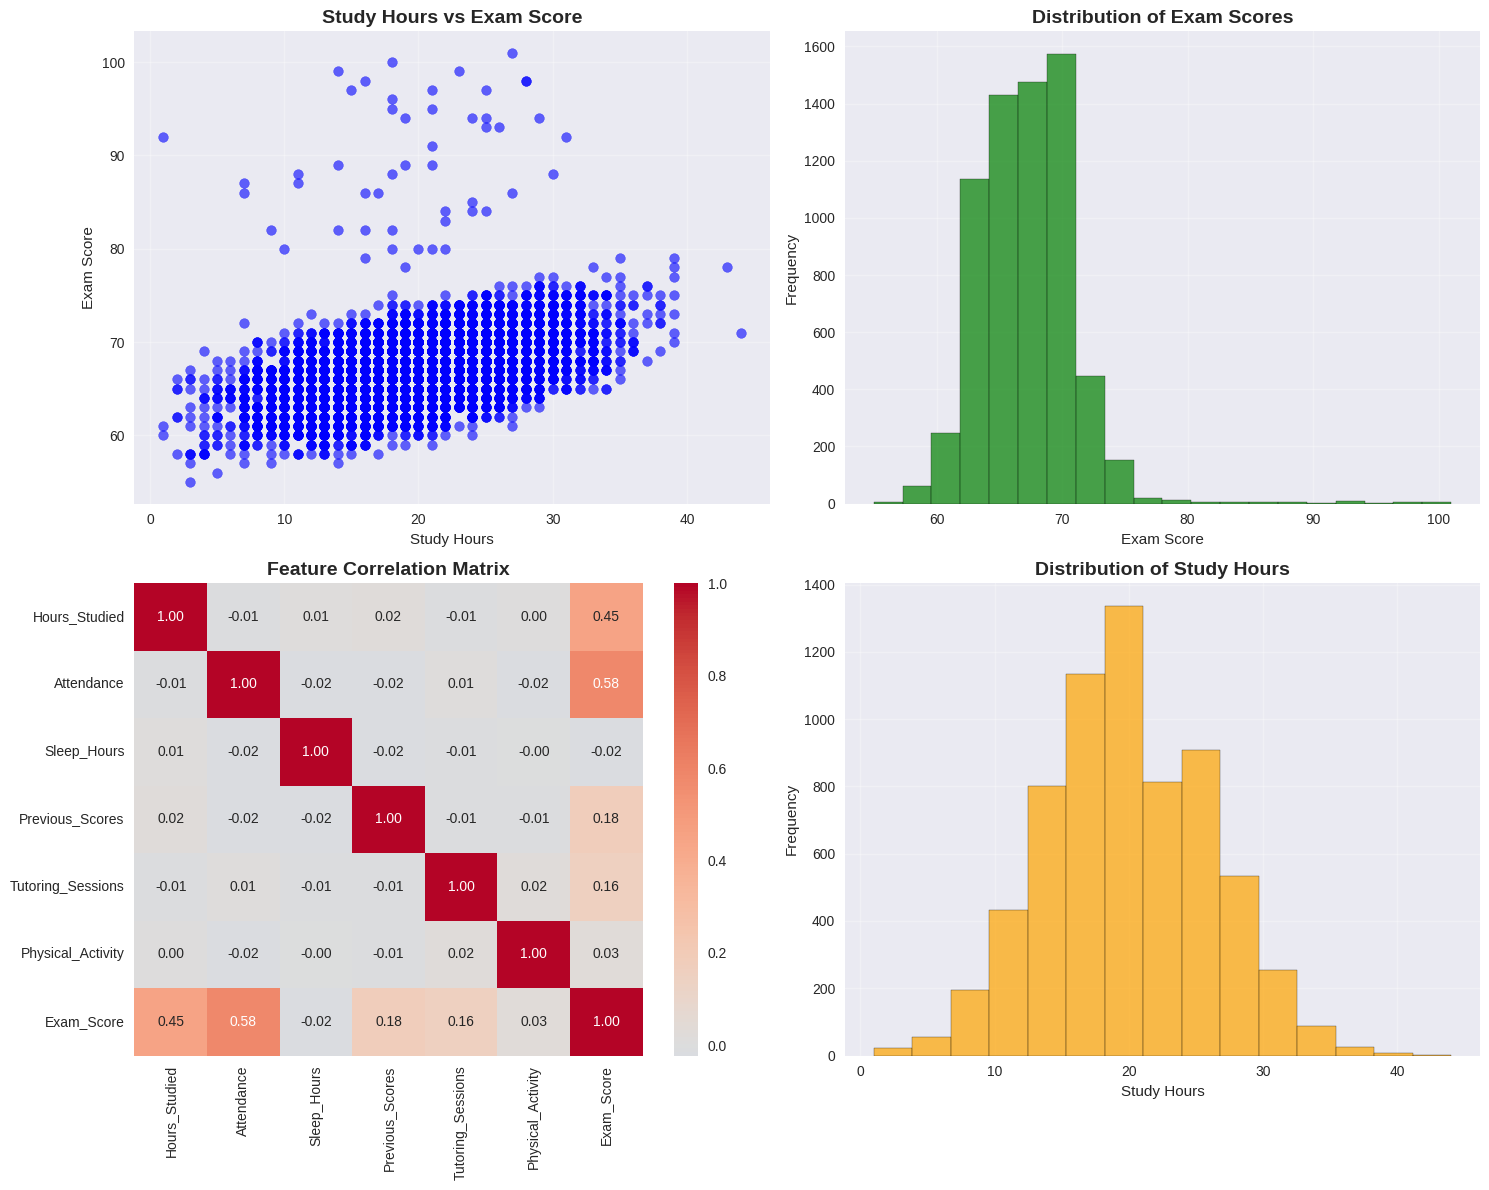

In [38]:
print("\n" + "="*40)
print("EXPLORATORY DATA ANALYSIS")
print("="*40)

# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Study Hours vs Exam Score
axes[0, 0].scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.6, color='blue')
axes[0, 0].set_title("Study Hours vs Exam Score", fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel("Study Hours")
axes[0, 0].set_ylabel("Exam Score")
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution of Exam Scores
axes[0, 1].hist(df['Exam_Score'], bins=20, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_title("Distribution of Exam Scores", fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel("Exam Score")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].grid(True, alpha=0.3)

# 3. Correlation heatmap (if multiple numeric columns exist)
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 2:
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                ax=axes[1, 0], fmt='.2f')
    axes[1, 0].set_title("Feature Correlation Matrix", fontsize=14, fontweight='bold')
else:
    axes[1, 0].text(0.5, 0.5, 'Not enough numeric\ncolumns for correlation',
                    ha='center', va='center', fontsize=12)
    axes[1, 0].set_title("Correlation Matrix", fontsize=14, fontweight='bold')

# 4. Study Hours distribution
axes[1, 1].hist(df['Hours_Studied'], bins=15, alpha=0.7, color='orange', edgecolor='black')
axes[1, 1].set_title("Distribution of Study Hours", fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel("Study Hours")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# **Feature & Target Selection**

In [39]:
X = df[['Hours_Studied']]  # Only study hours
y = df['Exam_Score']


# **Split Data into Training & Testing Sets**

In [40]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Linear Regression Model**

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 4. Predictions
y_pred = lin_reg.predict(X_test)

# 5. Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 2.45
MSE: 10.86
RMSE: 3.29
R² Score: 0.2320


# **Visualization of Predictions**

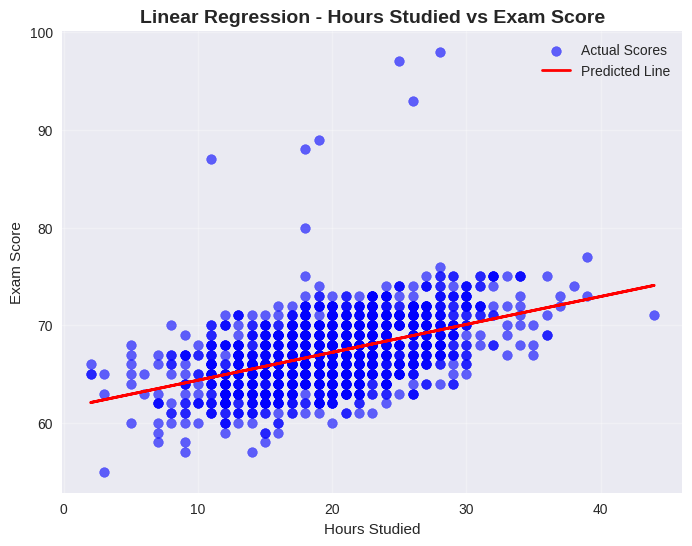

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Scores', alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.title("Linear Regression - Hours Studied vs Exam Score", fontsize=14, fontweight='bold')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# **BONUS 1: Polynomial Regression (Hours_Studied)**

In [45]:
print("\n--- BONUS: Polynomial Regression on Hours_Studied ---")
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_poly)
y_pred_poly = poly_reg.predict(X_test_poly)

mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f"Polynomial MAE: {mae_poly:.2f}")
print(f"Polynomial RMSE: {rmse_poly:.2f}")
print(f"Polynomial R²: {r2_poly:.4f}")



--- BONUS: Polynomial Regression on Hours_Studied ---
Polynomial MAE: 2.44
Polynomial RMSE: 3.29
Polynomial R²: 0.2328


# **Plot polynomial curve**

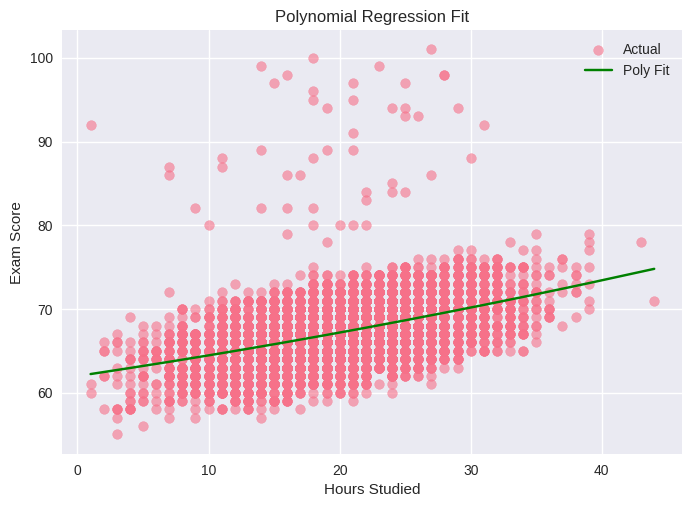

In [46]:
sort_idx = np.argsort(X['Hours_Studied'])
plt.scatter(X, y, label='Actual', alpha=0.6)
plt.plot(X.iloc[sort_idx], poly_reg.predict(poly_features.transform(X.iloc[sort_idx])), color='green', label='Poly Fit')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()

# **BONUS: Using All Features**

In [44]:
# ===============================
# BONUS 2: Use all features (with scaling + encoding)
# ===============================
print("\n--- BONUS: Using All Features ---")

# Separate target and features
X_all = df.drop(columns=['Exam_Score'])
y_all = df['Exam_Score']

# Identify numeric & categorical columns
num_cols = X_all.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_all.select_dtypes(exclude=[np.number]).columns.tolist()

# Preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# Build pipeline
full_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Fit model
full_model.fit(X_train_all, y_train_all)
y_pred_all = full_model.predict(X_test_all)

# Evaluate
mae_all = mean_absolute_error(y_test_all, y_pred_all)
rmse_all = np.sqrt(mean_squared_error(y_test_all, y_pred_all))
r2_all = r2_score(y_test_all, y_pred_all)

print(f"All Features MAE: {mae_all:.2f}")
print(f"All Features RMSE: {rmse_all:.2f}")
print(f"All Features R²: {r2_all:.4f}")


--- BONUS: Using All Features ---
All Features MAE: 0.45
All Features RMSE: 1.80
All Features R²: 0.7696
